#HR-Genetic Algorithms

import libary

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
# df = pd.read_csv('HR.csv')
url='https://drive.google.com/file/d/1uzkJ-dwvb4MrgqOeDE11nqRFGAdwfz9F/view?usp=share_link'
file_id=url.split('/')[-2]
print(file_id)
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

1uzkJ-dwvb4MrgqOeDE11nqRFGAdwfz9F


In [3]:
df


,gender,department,weight,height,age
0,Male,R,89,172,32
1,Male,R,89,180,52
2,Male,R,52,158,27
3,Male,R,50,157,39
4,Male,R,68,174,25
...,...,...,...,...,...
353,Female,J,73,168,38
354,Female,J,68,169,59
355,Female,J,49,155,33
356,Female,J,101,187,60


In [4]:
df.describe()

,weight,height,age
count,358.000000,358.000000,358.000000
mean,72.108939,167.918994,41.237430
std,14.528707,9.558115,10.983412
min,38.000000,142.000000,22.000000
25%,61.000000,161.000000,32.000000
50%,70.000000,168.000000,41.000000
75%,84.000000,175.000000,51.000000
max,106.000000,195.000000,60.000000


In [5]:
df.nunique()

gender         2
department    19
weight        63
height        47
age           39
dtype: int64

- เท่าเทียม อายุ เพศ bmi
- สามัคคี
- สัมพันธ์ระหว่างแผนก

2 สี

![picture](https://www.researchgate.net/profile/Rodrigo-Reis-17/publication/340892707/figure/fig2/AS:999789642645506@1615379834179/Steps-of-genetic-algorithm-for-human-resource-allocation.ppm)

![picture](https://www.researchgate.net/profile/Stefan-Elfwing-2/publication/267856080/figure/fig6/AS:669423161573389@1536614327688/One-point-crossover-between-two-bit-string-genotypes.png)

![picture](https://miro.medium.com/max/720/1*zF3DzW57qD_LOGO1jQwdcg.webp)

ลบ ช่องว่าง

In [6]:
df['department'] = df['department'].str.strip()

เพิ่ม col BMI

In [7]:
df["BMI"] = df["weight"] / (df["height"]/100)**2
df

,gender,department,weight,height,age,BMI
0,Male,R,89,172,32,30.083829
1,Male,R,89,180,52,27.469136
2,Male,R,52,158,27,20.829995
3,Male,R,50,157,39,20.284799
4,Male,R,68,174,25,22.460034
...,...,...,...,...,...,...
353,Female,J,73,168,38,25.864512
354,Female,J,68,169,59,23.808690
355,Female,J,49,155,33,20.395421
356,Female,J,101,187,60,28.882725


(bmi_mean1 - bmi_mean2)m + (age_mean1 - age_mean2)m + (c1-c2)m + (gender1-gender2)m

In [8]:
def fitness1(groupteam):
    group1 = df[groupteam == 1] # select data index groupteam == 1
    group2 = df[groupteam == 0]
    fitness_score = 0

    bmi_mean1, bmi_mean2 = group1['BMI'].mean(), group2['BMI'].mean()
    fitness_score += abs(bmi_mean1 - bmi_mean2)

    age_mean1, age_mean2 = group1['age'].mean(), group2['age'].mean()
    fitness_score += abs(age_mean1 - age_mean2)

    c1, c2 = group1['department'].value_counts(), group2['department'].value_counts()
    fitness_score += abs(c1-c2).mean()

    gender1, gender2 = group1['gender'].value_counts(), group2['gender'].value_counts()
    fitness_score += abs(gender1-gender2).mean()

    return fitness_score

mutation ทำาการ random เปลี่ยน 0 เป็น 1

In [9]:
def mutation(team_set):
  random_index = random.randint(0, len(team_set)-1)
  mutated_individual = team_set.copy()
  mutated_individual[random_index] = 1 if team_set[random_index] == 0 else 0
  return mutated_individual

In [10]:
def crossover(team_set1, team_set2):
  random_index = random.randint(0, len(team_set1)-1)
  offspring1 = np.concatenate([team_set1[:random_index], team_set2[random_index:]])
  offspring2 = np.concatenate([team_set2[:random_index], team_set1[random_index:]])
  return offspring1, offspring2

Select the best group top 10 Rank

1.   population เป็น array 100 แบบ ขนาดเท่า จำนวนสมาชิกทั้งหมด 
2.   fitness_scores เป็นแต้ม ของ array 100 แบบ 
3.   num_parents จำนวน พ่อพันธ์

Return TOP 10


In [11]:
def selection(population, fitness_scores, num_parents):
  parent_indices = np.argsort(fitness_scores)[:num_parents]
  parents = [population[i] for i in parent_indices]
  return parents

ทำการสุ่ม 0-1 ตามจำนวนสมาชิกทั้งหมด 100 แบบ

In [12]:
population = [np.random.randint(0, 2, size=len(df)) for _ in range(100)]
print(len(population))
print(len(population[0]))
population[0]

100
358


array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [13]:
num_generations = 100
num_parents = 20 

In [14]:
for generation in range(num_generations):
  fitness_scores = [fitness1(team_set) for team_set in population] # calculate fitness score
  parents = selection(population, fitness_scores, num_parents) # select rank top 10
  print(min(fitness_scores))
  team_sets = []
  for i in range(0, len(parents), 2): # step = 2 , start crossover 
    if i + 1 < len(parents): # len parents = num_parents
      team_set1, team_set2 = crossover(parents[i], parents[i+1]) # (0,1),(2,3),(4,5)
      team_sets.append(team_set1)
      team_sets.append(team_set2)
    else: break # end crossover
  team_sets = [mutation(team_set) for team_set in team_sets] # matation
  population = parents + team_sets # final data in generation

3.6345022842446912
3.6345022842446912
3.6345022842446912
3.6345022842446912
3.6345022842446912
2.734270503185082
2.734270503185082
2.734270503185082
2.380419122296315
2.380419122296315
2.380419122296315
2.380419122296315
2.3302115286208878
2.3302115286208878
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.9525042824275047
1.8967991253418228
1.8967991253418228
1.8967991253418228
1.8967991253418228
1.8967991253418228
1.8967991253418228
1.8967991253418228
1.8967991253418228


In [15]:
fitness_scores = [fitness1(team_set) for team_set in population]
best_team_set = population[np.argmin(fitness_scores)]
np.min(fitness_scores)


1.521170535059294

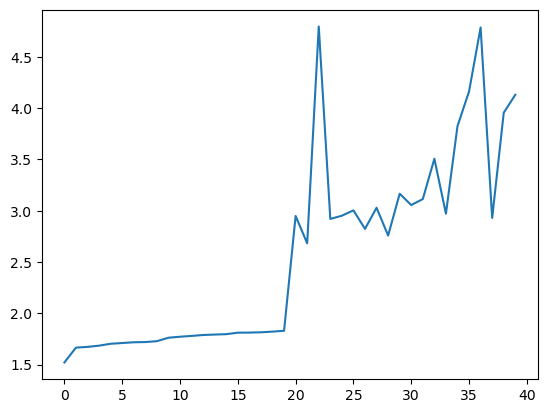

In [16]:
plt.plot(fitness_scores)

In [17]:
df["group"] = best_team_set

C:\Users\6352300197\AppData\Local\Temp\ipykernel_8468\1620155902.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("group").mean().plot(kind="bar")


<AxesSubplot:xlabel='group'>

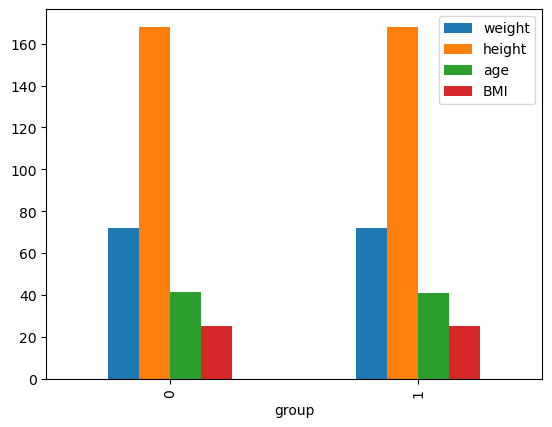

In [18]:
df.groupby("group").mean().plot(kind="bar")

In [19]:
df[df['group'] == 1].mean()

C:\Users\6352300197\AppData\Local\Temp\ipykernel_8468\2575950650.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['group'] == 1].mean()


weight     72.050279
height    168.050279
age        41.206704
BMI        25.247313
group       1.000000
dtype: float64

In [20]:
df[df['group'] == 0].mean()

C:\Users\6352300197\AppData\Local\Temp\ipykernel_8468\1934934819.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['group'] == 0].mean()


weight     72.167598
height    167.787709
age        41.268156
BMI        25.318142
group       0.000000
dtype: float64

In [21]:
df.groupby(['group', 'gender']).size().reset_index(name='counts')

,group,gender,counts
0,0,Female,118
1,0,Male,61
2,1,Female,118
3,1,Male,61


In [22]:
df['gender'].value_counts()

Female    236
Male      122
Name: gender, dtype: int64

             0     1
department          
A            3   3.0
B            1   NaN
C            3   3.0
D           36  36.0
E            6   8.0
F           14  14.0
G           20  20.0
H            5   5.0
I            5   2.0
J           15  14.0
K            9  10.0
L            7   3.0
M            5   9.0
N            1   7.0
O           16  16.0
P           12  10.0
Q            3   2.0
R           12  11.0
S            6   6.0
   department  dif
0           A  0.0
1           B  NaN
2           C  0.0
3           D  0.0
4           E  2.0
5           F  0.0
6           G  0.0
7           H  0.0
8           I  3.0
9           J  1.0
10          K  1.0
11          L  4.0
12          M  4.0
13          N  6.0
14          O  0.0
15          P  2.0
16          Q  1.0
17          R  1.0
18          S  0.0


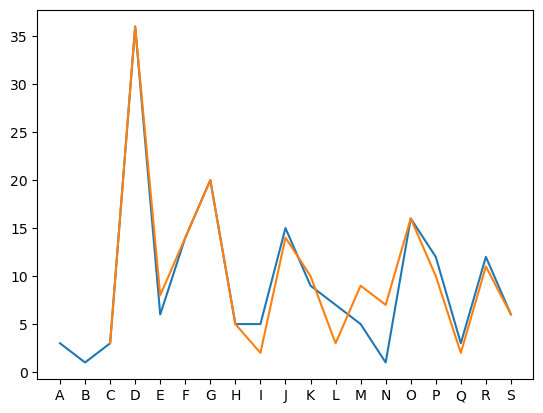

In [23]:
a = df[df['group']== 0].groupby(['department']).size()
b = df[df['group']== 1].groupby(['department']).size()
c =  pd.concat([a, b], axis=1)
print(c)

dif =  abs( a - b ).reset_index(name='dif')
print(dif)

plt.plot(c)